In [ ]:
from google.colab import drive
drive.mount('/content/drive/') 
# click on the url that pops up and give the necessary authorizations

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cd drive/My\ Drive/CS\ 412\ -\ Car\ Price\ Prediction\ Project\ -\ Group\ 1

[Errno 2] No such file or directory: 'drive/My Drive/CS 412 - Car Price Prediction Project - Group 1'
/content/drive/My Drive/CS 412 - Car Price Prediction Project - Group 1


In [ ]:
ls

 Group1_CarPricePrediction.ipynb
'Group1_CarPricePrediction.ipynb adlı not defterinin kopyası'
'output (1).xlsx'
 output.xlsx
 sample_submission.csv
 test.csv
 train.csv
 train.gsheet


In [ ]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy as np
from collections import Counter
import operator

df_train = pd.read_csv("train.csv")


In [ ]:
df_train

,ID,brand,model,year,transmission,mileage,fuelType,mpg,engineSize,tax,tax(£),price
0,0,vw,Golf,2020.0,Semi-Auto,1506.0,Petrol,32.8,2.0,145.0,NaN,34495
1,1,audi,A3,2014.0,Manual,48037.0,Diesel,74.3,1.6,0.0,NaN,12239
2,2,ford,Focus,2019.0,Automatic,7267.0,Diesel,54.3,1.5,145.0,NaN,17000
3,3,toyota,Yaris,2014.0,Automatic,8290.0,Hybrid,80.7,1.5,0.0,NaN,10499
4,4,ford,Focus,2014.0,Manual,45158.0,Petrol,56.5,1.0,30.0,NaN,7490
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,merc,C Class,2019.0,Semi-Auto,10577.0,Diesel,57.7,2.0,145.0,NaN,29549
59996,59996,vw,Golf,2016.0,Semi-Auto,47006.0,Petrol,40.4,2.0,200.0,NaN,17975
59997,59997,vw,Passat,2014.0,Manual,57973.0,Diesel,61.4,2.0,30.0,NaN,7750
59998,59998,skoda,Citigo,2017.0,Manual,36974.0,Petrol,64.2,1.0,20.0,NaN,6190


In [ ]:
corr = df_train.corr()

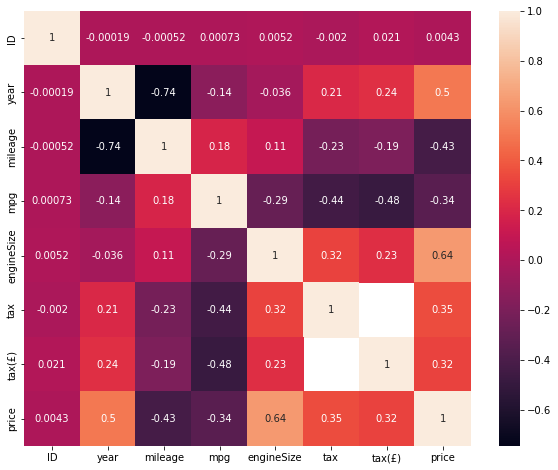

In [ ]:
import seaborn as sns

ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr, annot=True)


In [ ]:
df_train.columns

Index(['ID', 'brand', 'model', 'year', 'transmission', 'mileage', 'fuelType',
       'mpg', 'engineSize', 'tax', 'tax(£)', 'price'],
      dtype='object')

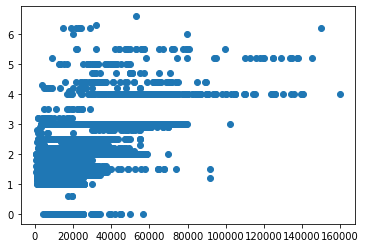

In [ ]:
plt.scatter(df_train["price"], df_train["engineSize"])
plt.show()

In [ ]:
df_train[["engineSize"]]

,engineSize
0,2.0
1,1.6
2,1.5
3,1.5
4,1.0
...,...
59995,2.0
59996,2.0
59997,2.0
59998,1.0


In [ ]:
df_train['brand'].value_counts()

ford      12577
vw        10653
merc       9142
audi       7529
bmw        7485
toyota     4723
skoda      4453
hyundi     3372
Name: brand, dtype: int64

In [ ]:
df_train['model'].value_counts()

 Fiesta       4569
 Golf         3445
 Focus        3214
 C Class      2596
 Polo         2279
              ... 
 CLC Class       1
180              1
 Streetka        1
 R Class         1
 RS7             1
Name: model, Length: 171, dtype: int64

In [ ]:
from numpy.core.numeric import NaN
def unique(pred):
    # initialize an empty list
    unique_list = []
     
    # traverse for all elements
    for x in pred:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    return unique_list

def find_brand_names(after_dict_list):
  brand_names=[]
  for element in after_dict_list:
    if element[0] not in brand_names:
      if str(element[0]) != "nan":
        brand_names.append(element[0])
  return brand_names

def dictionary_most_common_model_from_brand(brand_names, prev_dict_list, after_dict_list):
  volkswagen = []
  audi = []
  ford = []
  toyota = []
  hyundai =[]
  mercedes = []
  bmw =[]
  skoda =[]

  for element in after_dict_list:
      if element[0] == brand_names[0]:
        if element[0] not in volkswagen:
          volkswagen.append(brand_names[0])
      elif element[0] == brand_names[1]:
        if element[0] not in audi:
          audi.append(brand_names[1])
      elif element[0] == brand_names[2]:
        if element[0] not in ford:
          ford.append(brand_names[2])
      elif element[0] == brand_names[3]:
        if element[0] not in toyota:
          toyota.append(brand_names[3])
      elif element[0] == brand_names[4]:
        if element[0] not in hyundai:
          hyundai.append(brand_names[4])
      elif element[0] == brand_names[5]:
        if element[0] not in mercedes:
          mercedes.append(brand_names[5])
      elif element[0] ==  brand_names[6]:
        if element[0] not in bmw:
          bmw.append(brand_names[6])
      elif element[0] == brand_names[7]:
        if element[0] not in skoda:
          skoda.append(brand_names[7])

  for value_element in prev_dict_list:
    if value_element[0] == volkswagen[0]:
      if str(value_element[1]) != "nan":
        volkswagen.append(value_element[1])
    elif value_element[0] == audi[0]:
      if str(value_element[1]) != "nan":
        audi.append(value_element[1])
    if value_element[0] == ford[0]:
      if str(value_element[1]) != "nan":
        ford.append(value_element[1])
    if value_element[0] == toyota[0]:
      if str(value_element[1]) != "nan":
        toyota.append(value_element[1])
    if value_element[0] == hyundai[0]:
      if str(value_element[1]) != "nan":
        hyundai.append(value_element[1])
    if value_element[0] == mercedes[0]:
      if str(value_element[1]) != "nan":
        mercedes.append(value_element[1])
    if value_element[0] == bmw[0]:
      if str(value_element[1]) != "nan":
        bmw.append(value_element[1])
    if value_element[0] == skoda[0]:
      if str(value_element[1]) != "nan":
        skoda.append(value_element[1])
  
  occurrences_volkswagen = Counter(volkswagen)
  most_volkswagen = occurrences_volkswagen.most_common(1)

  occurrences_audi = Counter(audi)
  most_audi = occurrences_audi.most_common(1)

  occurrences_ford = Counter(ford)
  most_ford = occurrences_ford.most_common(1)

  occurrences_toyota = Counter(toyota)
  most_toyota = occurrences_toyota.most_common(1)

  occurrences_hyundai = Counter(hyundai)
  most_hyundai = occurrences_hyundai.most_common(1)

  occurrences_mercedes = Counter(mercedes)
  most_mercedes = occurrences_mercedes.most_common(1)

  occurrences_bmw = Counter(bmw)
  most_common_bmw = max(occurrences_bmw, key=occurrences_bmw.get)
  most_bmw = occurrences_bmw.most_common(1)

  occurrences_skoda = Counter(skoda)
  most_common_skoda = max(occurrences_skoda, key=occurrences_skoda.get)
  most_skoda = occurrences_skoda.most_common(1)
    

  keys = brand_names
  values = [most_volkswagen[0][0],most_audi[0][0],most_ford[0][0],most_toyota[0][0], most_hyundai[0][0],most_mercedes[0][0],most_common_bmw, most_common_skoda]
  
  mcmpb = dict(zip(keys, zip(values)))
  return mcmpb

prev_dict_list = list(zip(df_train.brand, df_train.model))
after_dict_list = unique(prev_dict_list)

print("Before: ", len(prev_dict_list), " After: ", len(after_dict_list))



brands = find_brand_names(after_dict_list)
print("Brand Names: ", brands)

mcmpb = dictionary_most_common_model_from_brand(brands, prev_dict_list, after_dict_list)
mcmpb

Before:  60000  After:  216
Brand Names:  ['vw', 'audi', 'ford', 'toyota', 'hyundi', 'merc', 'bmw', 'skoda']


{'audi': (' A3',),
 'bmw': (' 3 Series',),
 'ford': (' Fiesta',),
 'hyundi': (' Tucson',),
 'merc': (' C Class',),
 'skoda': (' Fabia',),
 'toyota': (' Yaris',),
 'vw': (' Golf',)}

In [ ]:
index_model_list= df_train[df_train['model'].isnull()].index.tolist()

for i in index_model_list:
  if df_train['model'].isnull()[i] and df_train['brand'].notnull()[i]:
    df_train['model'][i] = mcmpb[df_train['brand'][i]][0]

df_train["model"].isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0

In [ ]:
from numpy.core.numeric import NaN
def unique(pred):
    # initialize an empty list
    unique_list = []
     
    # traverse for all elements
    for x in pred:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    return unique_list

def find_brand_names(after_dict_list):
  brand_names=[]
  for element in after_dict_list:
    if element[0] not in brand_names:
      if str(element[0]) != "nan":
        brand_names.append(element[0])
  return brand_names

def dictionary_model_to_brand(brand_names, prev_dict_list, after_dict_list):
  volkswagen = []
  audi = []
  ford = []
  toyota = []
  hyundai =[]
  mercedes = []
  bmw =[]
  skoda =[]

  for element in after_dict_list:
      if element[0] == brand_names[0]:
        if element[0] not in volkswagen:
          volkswagen.append(brand_names[0])
      elif element[0] == brand_names[1]:
        if element[0] not in audi:
          audi.append(brand_names[1])
      elif element[0] == brand_names[2]:
        if element[0] not in ford:
          ford.append(brand_names[2])
      elif element[0] == brand_names[3]:
        if element[0] not in toyota:
          toyota.append(brand_names[3])
      elif element[0] == brand_names[4]:
        if element[0] not in hyundai:
          hyundai.append(brand_names[4])
      elif element[0] == brand_names[5]:
        if element[0] not in mercedes:
          mercedes.append(brand_names[5])
      elif element[0] ==  brand_names[6]:
        if element[0] not in bmw:
          bmw.append(brand_names[6])
      elif element[0] == brand_names[7]:
        if element[0] not in skoda:
          skoda.append(brand_names[7])

  for value_element in after_dict_list:
    if value_element[0] == volkswagen[0]:
      if str(value_element[1]) != "nan":
        volkswagen.append(value_element[1])
    elif value_element[0] == audi[0]:
      if str(value_element[1]) != "nan":
        audi.append(value_element[1])
    if value_element[0] == ford[0]:
      if str(value_element[1]) != "nan":
        ford.append(value_element[1])
    if value_element[0] == toyota[0]:
      if str(value_element[1]) != "nan":
        toyota.append(value_element[1])
    if value_element[0] == hyundai[0]:
      if str(value_element[1]) != "nan":
        hyundai.append(value_element[1])
    if value_element[0] == mercedes[0]:
      if str(value_element[1]) != "nan":
        mercedes.append(value_element[1])
    if value_element[0] == bmw[0]:
      if str(value_element[1]) != "nan":
        bmw.append(value_element[1])
    if value_element[0] == skoda[0]:
      if str(value_element[1]) != "nan":
        skoda.append(value_element[1])
  

  keys = []
  for i in volkswagen[1:]:
    keys.append(i)
  for i in audi[1:]:
    keys.append(i)
  for i in ford[1:]:
    keys.append(i)
  for i in toyota[1:]:
    keys.append(i)
  for i in hyundai[1:]:
    keys.append(i)
  for i in mercedes[1:]:
    keys.append(i)
  for i in bmw[1:]:
    keys.append(i)
  for i in skoda[1:]:
    keys.append(i)
  
  values = []
  for i in range(0, len(volkswagen[1:])):
    values.append(volkswagen[0])
  for i in range(0, len(audi[1:])):
    values.append(audi[0])
  for i in range(0, len(ford[1:])):
    values.append(ford[0])
  for i in range(0, len(toyota[1:])):
    values.append(toyota[0])
  for i in range(0, len(hyundai[1:])):
    values.append(hyundai[0])
  for i in range(0, len(mercedes[1:])):
    values.append(mercedes[0])
  for i in range(0, len(bmw[1:])):
    values.append(bmw[0])
  for i in range(0, len(skoda[1:])):
    values.append(skoda[0])

  dmtb = dict(zip(keys, zip(values)))
  return dmtb


after_dict_list = unique(prev_dict_list)

brands = find_brand_names(after_dict_list)
print("Brand Names: ", brands)

dmtb = dictionary_model_to_brand(brands, prev_dict_list, after_dict_list)



Brand Names:  ['vw', 'audi', 'ford', 'toyota', 'hyundi', 'merc', 'bmw', 'skoda']


In [ ]:
index_brand_list= df_train[df_train['brand'].isnull()].index.tolist()

for i in index_brand_list:
  if df_train['brand'].isnull()[i] and df_train['model'].notnull()[i]:
    df_train['brand'][i] = dmtb[df_train['model'][i]][0]

df_train["brand"].isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0

In [ ]:
df_train['tax(£)'] = df_train['tax(£)'].fillna(0)
df_train['tax'] = df_train['tax'].fillna(0)

In [ ]:
df_train["mileage"].isnull().sum() #66 missing values in mileage

66

In [ ]:
index = df_train["mileage"].index[df_train["mileage"].apply(np.isnan)]
index #the index values of missing ones listed

Int64Index([  551,   640,   785,  3063,  3887,  4656,  5304,  6924,  7209,
             7287,  9066,  9735, 10492, 12011, 13035, 14242, 14323, 15174,
            15873, 16115, 16963, 17196, 18406, 18533, 20248, 21916, 23491,
            26068, 26851, 28182, 28742, 28750, 30583, 31690, 31853, 32700,
            32716, 33655, 33931, 34046, 35345, 36555, 37627, 37708, 37941,
            39518, 39792, 40491, 40602, 41964, 42917, 42972, 43881, 46025,
            48389, 48734, 50357, 52072, 53983, 55224, 55279, 56018, 56757,
            56867, 57607, 57892],
           dtype='int64')

In [ ]:
#mileage values are filled by considering negative correlation with price and year
for i in index:
  if df_train["year"].notnull()[i] and df_train["price"].notnull()[i]:
    df_train["mileage"][i]=round(df_train["year"][i]*(1/0.74)+df_train["price"][i]*(1/0.43))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_train["mileage"].isnull().sum()   #no null value exists result of changes 

0

In [ ]:
df_train["mpg"].isnull().sum() 

64

In [ ]:
missing_mpg = df_train["mpg"].index[df_train["mpg"].apply(np.isnan)]
missing_mpg

Int64Index([   18,    70,   107,   215,   401,  2558,  4153,  4996,  8632,
            10677, 11479, 12069, 13065, 18302, 18836, 19825, 20229, 20442,
            20980, 21238, 22122, 23424, 23511, 24392, 25632, 26020, 28869,
            28891, 30729, 31648, 34722, 35153, 35651, 38109, 38369, 39717,
            39932, 40761, 41176, 42687, 42757, 43321, 43535, 43590, 44372,
            45495, 45513, 46005, 46319, 47016, 47959, 49007, 50628, 50752,
            51367, 51814, 52207, 52702, 53622, 53651, 54775, 56606, 58610,
            59184],
           dtype='int64')

In [ ]:
#mpg values are filled by considering positive correlation with mileage and negative correlation with tax (for two columns)
for i in missing_mpg:
  if df_train["mileage"].notnull()[i] and df_train["tax"][i]==0:
    df_train["mpg"][i]=round(df_train["mileage"][i]*0.18+df_train["tax(£)"][i]*(1/0.48))
  elif df_train["mileage"].notnull()[i] and df_train["tax(£)"][i]==0:
    df_train["mpg"][i]=round(df_train["mileage"][i]*0.18+df_train["tax"][i]*(1/0.44))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_train["mpg"].isnull().sum() 

0

In [ ]:
prev_dict_list_year=list(zip(df_train.brand, df_train.model,df_train.year))
after_dict_list_year = unique(prev_dict_list_year)
for i in range(len(after_dict_list_year)):
  if after_dict_list_year[i][2]=='nan':
    del after_dict_list_year  #remove the ones that has nan year

In [ ]:
list_brand_model=[]
for i in after_dict_list_year:
  list_temp=[]
  list_temp.append(i[0])
  list_temp.append(i[1])
  list_brand_model.append(list_temp)

In [ ]:
unique_brand_model=unique(list_brand_model)

In [ ]:
list_corresponindg_year=[]
for j in range(len(unique_brand_model)):
     list_year=[]
     for i in range(len(prev_dict_list_year)):
       if(prev_dict_list_year[i][2]!="nan"):
         if (prev_dict_list_year[i][0]==unique_brand_model[j][0] and prev_dict_list_year[i][1]==unique_brand_model[j][1]):
           list_year.append(prev_dict_list_year[i][2])
     max_count=max(list_year,key=list_year.count)
     list_corresponindg_year.append(max_count)

In [ ]:
index_year_list= df_train[df_train['year'].isnull()].index.tolist()

for i in index_year_list:
  list_temp=[]
  list_temp.append(df_train["brand"][i])
  list_temp.append(df_train["model"][i])
  index=unique_brand_model.index(list_temp)
  df_train["year"][i]=list_corresponindg_year[index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_train["year"].isnull().sum()

0

In [ ]:
prev_dict_list_transmission=list(zip(df_train.brand, df_train.model,df_train.transmission))
after_dict_list_transmission = unique(prev_dict_list_transmission)
for i in range(len(after_dict_list_transmission)):
  if after_dict_list_transmission[i][2]=='nan':
    del after_dict_list_transmission  #remove the ones that has nan transmission

In [ ]:
list_corresponding_transmission=[]
for j in range(len(unique_brand_model)):
     list_transmission=[]
     for i in range(len(prev_dict_list_transmission)):
       if(prev_dict_list_transmission[i][2]!="nan"):
         if (prev_dict_list_transmission[i][0]==unique_brand_model[j][0] and prev_dict_list_transmission[i][1]==unique_brand_model[j][1]):
           list_transmission.append(prev_dict_list_transmission[i][2])
     max_count=max(list_transmission,key=list_transmission.count)
     list_corresponding_transmission.append(max_count)

In [ ]:
index_list_transmission= df_train[df_train['transmission'].isnull()].index.tolist()

for i in index_list_transmission:
  list_temp=[]
  list_temp.append(df_train["brand"][i])
  list_temp.append(df_train["model"][i])
  index=unique_brand_model.index(list_temp)
  df_train["transmission"][i]=list_corresponding_transmission[index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_train["transmission"].isnull().sum()
#Mercedes CLC Class discard edilecek
#Daha öncden herhangi bir veri bulunamadı
#Araştırmalar göre manual ya da automatic ataması yapılabilir

1

In [ ]:
prev_dict_list_fuelType=list(zip(df_train.brand, df_train.model,df_train.fuelType))
after_dict_list_fuelType=unique(prev_dict_list_fuelType)
for i in range(len(after_dict_list_fuelType)):
  if after_dict_list_fuelType[i][2]=='nan':
    del after_dict_list_fuelType  #remove the ones that has nan fueltype

In [ ]:
list_corresponding_fuel=[]
for j in range(len(unique_brand_model)):
     list_fuelTypes=[]
     for i in range(len(prev_dict_list_fuelType)):
       if(prev_dict_list_fuelType[i][2]!="nan"):
         if (prev_dict_list_fuelType[i][0]==unique_brand_model[j][0] and prev_dict_list_fuelType[i][1]==unique_brand_model[j][1]):
           list_fuelTypes.append(prev_dict_list_fuelType[i][2])
     max_count=max(list_fuelTypes,key=list_fuelTypes.count)
     list_corresponding_fuel.append(max_count)

In [ ]:
index_fuelType_list= df_train[df_train['fuelType'].isnull()].index.tolist()

for i in index_fuelType_list:
  list_temp=[]
  list_temp.append(df_train["brand"][i])
  list_temp.append(df_train["model"][i])
  index=unique_brand_model.index(list_temp)
  df_train["fuelType"][i]=list_corresponding_fuel[index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_train["fuelType"].isnull().sum()

0

In [ ]:
import math
prev_dict_list_engineSize=list(zip(df_train.brand, df_train.model,df_train.engineSize))
engineSizeValues=[]
for i in prev_dict_list_engineSize:
  if i[2] not in engineSizeValues:
    if math.isnan(i[2]) is not True:
      engineSizeValues.append(i[2])    #find engine size values

In [ ]:
#corresponding average engine size for unique_brand_model
avg_engineSize=[]
for i in unique_brand_model:
  totalEngineSize=0
  avgEngineSize=0
  count=0
  for j in prev_dict_list_engineSize:
    if (math.isnan(j[2])) is not True:
      if(i[0]==j[0] and i[1]==j[1]):
        totalEngineSize=totalEngineSize+j[2]
        count+=1
  avgEngineSize=totalEngineSize/count
  avg_engineSize.append(round(avgEngineSize, 1))

In [ ]:
index_engineSize_list= df_train[df_train['engineSize'].isnull()].index.tolist()

for i in index_engineSize_list:
  list_temp=[]
  list_temp.append(df_train["brand"][i])
  list_temp.append(df_train["model"][i])
  index=unique_brand_model.index(list_temp)
  df_train["engineSize"][i]=avg_engineSize[index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_train["engineSize"].isnull().sum()

0

In [ ]:
df_train = df_train.drop(58303)

In [ ]:
df_train["transmission"].isnull().sum()

0

In [ ]:
df_train.to_excel("output.xlsx") 
from google.colab import files  #in order to see the filled values created excel file is downloaded.
files.download("output.xlsx") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>